In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Download NLTK resources (stopwords)
import nltk
nltk.download('stopwords')

# Load your dataset
df_details = pd.read_json("/content/drive/MyDrive/netflix_Model/IMDB_movie_details.json", lines=True)
#df_reviews = pd.read_json("/content/drive/MyDrive/netflix_Model/IMDB_reviews.json", lines=True)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [ ]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


<ipython-input-10-0f00a09b8ea3>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  binary_matrix = pd.get_dummies(df_details['genre'].apply(pd.Series).stack()).sum(level=0)
<ipython-input-10-0f00a09b8ea3>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = mean_per_combination.pivot('genre', 'value', 'rating')


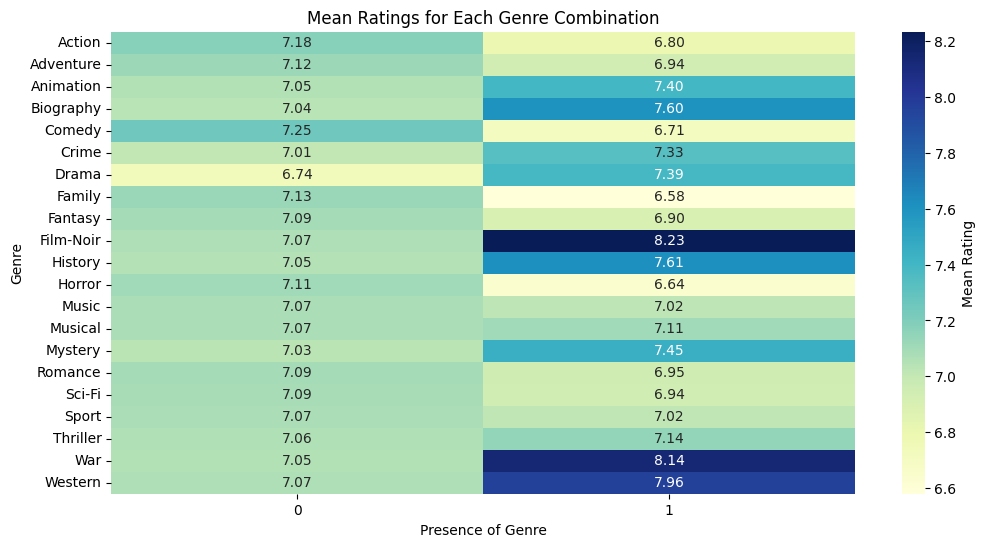

In [ ]:
# Create a binary matrix for genres
binary_matrix = pd.get_dummies(df_details['genre'].apply(pd.Series).stack()).sum(level=0)

# Add the 'Rating' column to the binary matrix
binary_matrix['rating'] = df_details['rating']

# Melt the binary matrix to convert it into a single-label format
melted_df = pd.melt(binary_matrix, id_vars=['rating'], value_vars=binary_matrix.columns[:-1], var_name='genre')

# Calculate the mean for each unique combination of labels
mean_per_combination = melted_df.groupby(['genre', 'value']).mean().reset_index()

# Pivot the data to create a table for the heatmap
heatmap_data = mean_per_combination.pivot('genre', 'value', 'rating')

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Mean Rating'})

# Set plot labels and title
plt.title('Mean Ratings for Each Genre Combination')
plt.xlabel('Presence of Genre')
plt.ylabel('Genre')

# Display the plot
plt.show()

Streaming output truncated to the last 5000 lines.
<ipython-input-19-698123871421>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-input-19-698123871421>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-input-19-698123871421>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-input-19-698123871421>:6: FutureWarning: The frame.append method is deprecated and will be removed from panda

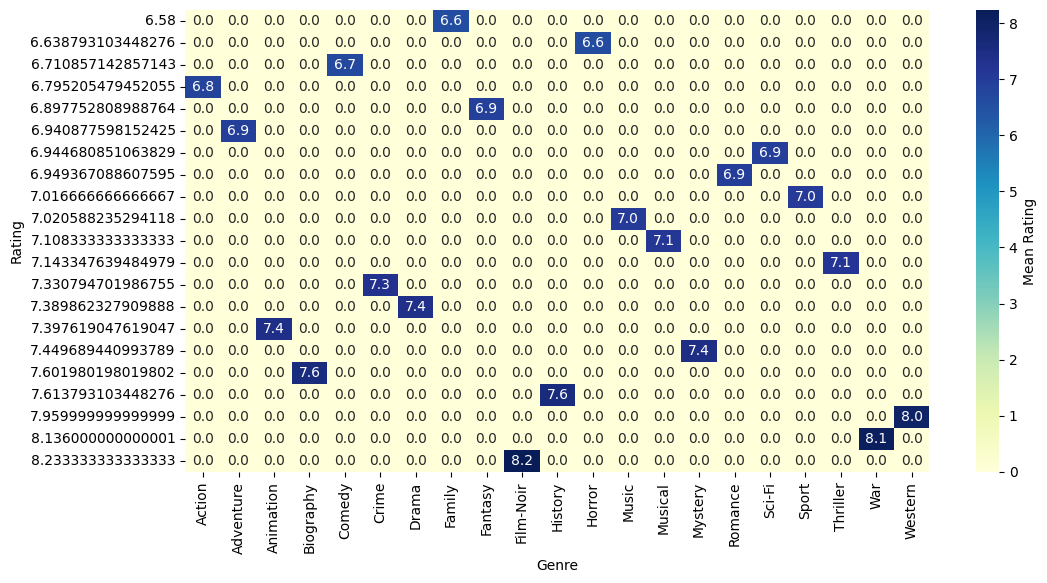

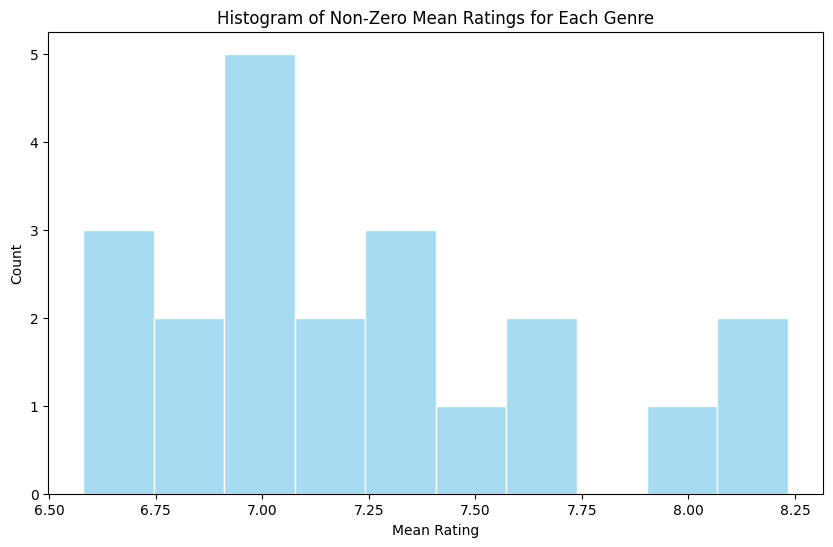

In [ ]:
# Create a new DataFrame with single-label data
single_label_data = pd.DataFrame({'Genre': [], 'Rating': []})

for index, row in df_details.iterrows():
    for genre in row['genre']:
        single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)

# Calculate the mean for each unique combination of labels
mean_per_combination = single_label_data.groupby('Genre').mean().reset_index()

# Pivot the data to create a table for the heatmap
heatmap_data = mean_per_combination.pivot('Rating', 'Genre', 'Rating').fillna(0)

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Mean Rating'})

# Flatten the matrix and remove zeros
non_zero_values = heatmap_data.values.flatten()[heatmap_data.values.flatten() != 0]

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_values, bins=, color='skyblue', edgecolor='w')

# Set plot labels and title
plt.title('Histogram of Non-Zero Mean Ratings for Each Genre')
plt.xlabel('Mean Rating')
plt.ylabel('Count')

# Display the plot
plt.show()

Streaming output truncated to the last 5000 lines.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-input-20-47b73219fc9b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-input-20-47b73219fc9b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-input-20-47b73219fc9b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)
<ipython-

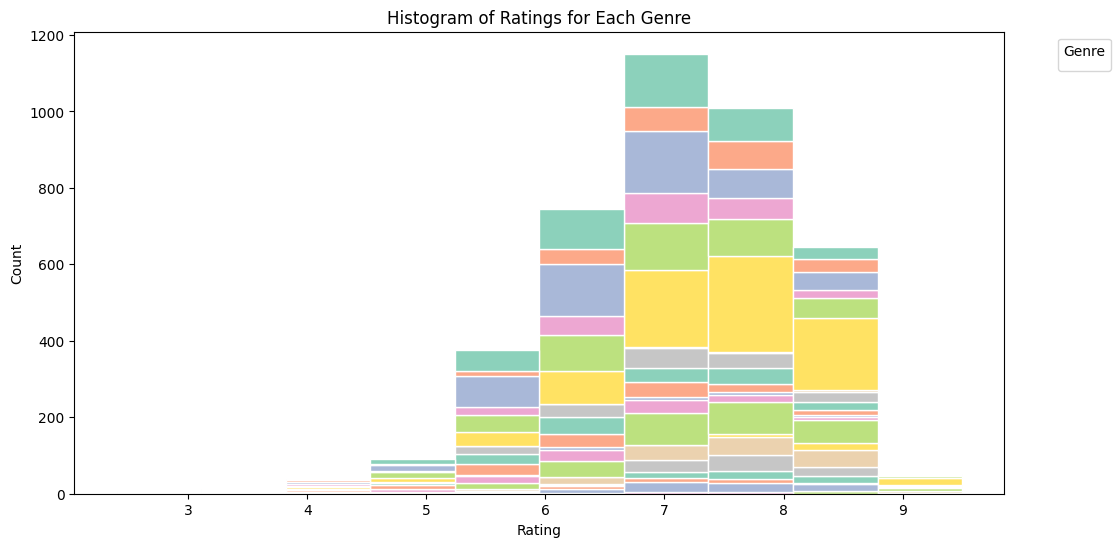

In [ ]:
# Create a new DataFrame with single-label data
single_label_data = pd.DataFrame({'Genre': [], 'Rating': []})

for index, row in df_details.iterrows():
    for genre in row['genre']:
        single_label_data = single_label_data.append({'Genre': genre, 'Rating': row['rating']}, ignore_index=True)

# Calculate the mean for each unique combination of labels
mean_per_combination = single_label_data.groupby('Genre').mean().reset_index()

# Pivot the data to create a table for the heatmap
heatmap_data = mean_per_combination.pivot('Rating', 'Genre', 'Rating').fillna(0)

# Flatten the matrix and remove zeros
non_zero_values = heatmap_data.values.flatten()[heatmap_data.values.flatten() != 0]

# Create a histogram using Seaborn with all genres on the axes
plt.figure(figsize=(12, 6))
sns.histplot(data=single_label_data, x='Rating', hue='Genre', bins=10, multiple="stack", palette='Set2', edgecolor='w')

# Set plot labels and title
plt.title('Histogram of Ratings for Each Genre')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [ ]:
# Convert genres to binary representation using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df_details['genre'])


In [ ]:
# Concatenate the genre matrix with the original DataFrame
df_details = pd.concat([df_details, pd.DataFrame(genre_matrix, columns=mlb.classes_)], axis=1)
# Drop the original 'Genre' column
df_details = df_details.drop('genre', axis=1)


In [ ]:
df_details.columns

Index(['movie_id', 'plot_summary', 'duration', 'rating', 'release_date',
       'plot_synopsis', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
# Split the data into training and testing sets
X = df_details.drop(['movie_id', 'plot_summary', 'duration','rating', 'release_date',
       'plot_synopsis'], axis=1)
y = df_details['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
# Train a K-Nearest Neighbors Regressor model
KNeighbor_model = KNeighborsRegressor(n_neighbors=3)
KNeighbor_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Make predictions on the test set
predictions = KNeighbor_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.97
R-squared: -0.07


In [ ]:
result_df = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': predictions})
print(result_df)

      Actual Rating  Predicted Rating
1120            8.1          7.100000
810             5.6          7.100000
1170            7.2          7.966667
534             7.0          5.700000
514             8.3          7.500000
...             ...               ...
1262            6.7          6.933333
1280            9.0          7.900000
1208            8.2          7.566667
1007            7.4          7.600000
1403            7.7          7.566667

[315 rows x 2 columns]


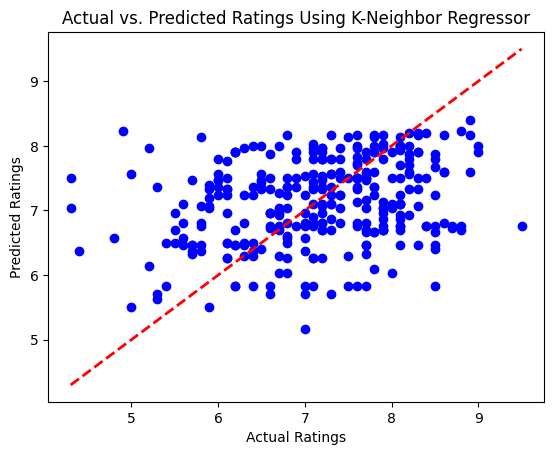

In [ ]:
# Visualize the actual vs. predicted ratings
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings Using K-Neighbor Regressor')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [ ]:
# Train a linear regression model
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
linear_predictions = Linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.72
R-squared: 0.22


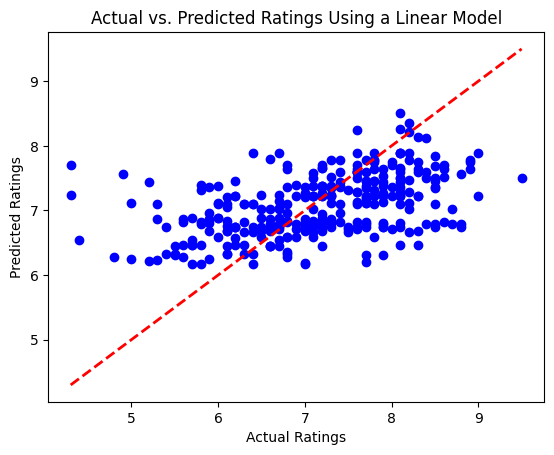

In [ ]:
# Visualize the actual vs. predicted ratings
plt.scatter(y_test, linear_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings Using a Linear Model')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Something Dump


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Tokenize the plot summaries
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_inputs = tokenizer(list(df_details['plot_summary']), padding=True, truncation=True, return_tensors='pt')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(tokenized_inputs['input_ids'], df_details['rating'], test_size=0.2, random_state=42)


In [ ]:
# Create a neural network model
class MovieRatingModel(nn.Module):
    def __init__(self):
        super(MovieRatingModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.fc = nn.Linear(768, 1)  # 768 is the output size of BERT

    def forward(self, input_ids):
        outputs = self.bert(input_ids)
        last_hidden_state = outputs.last_hidden_state[:, 0, :]  # Take the [CLS] token representation
        rating_pred = self.fc(last_hidden_state)
        return rating_pred


In [ ]:
# Instantiate the model, loss function, and optimizer
model = MovieRatingModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Training the model
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
